1. Simulate a random walk of an agent on a square lattice. The program should take a snapshot of the lattice in every time step and save it to a jpg or png file. These files should then be used to generate a movie in an animated gif format.

2. Write a computer program to simulate Pearson’s random walk in the plane, where the steps have constant length a = 1 and uniformly distributed random angles. By simulating many long walks of N steps (e.g. N = 1000) starting from the origin, compute and plot normalized histograms (i.e. the PDFs) of AN , the fraction of time steps when the walker is in right half plane (x > 0) and of BN , the fraction of time the walker is in the first quadrant (x > 0, y > 0). The expected values are clearly ⟨AN ⟩ = 1/2 and ⟨BN ⟩ =1/4
, but what are the most probable values? Plot several trajectories to illustrate your results.

3. Write a program that. . .
(a) will illustrate a random walk on a given graph (animated gif),
(b) for a given origin node will estimate average hitting times of all other nodes.
Compare the results for graphs of different topologies. Set N = 20 for visualization purposes and N = 100 otherwise.

In [47]:
import numpy as np 
from statistics import mean
import matplotlib.pyplot as plt
import networkx as nx
import random
import imageio
import seaborn as sns
import networkx as nx

In [48]:
class Graph:
    '''representation of graph'''

    def __init__(self):
        self.vertices = {}
        self.edges = []

    def addVertex(self, vert):
        '''add a new vertex to the graph'''
        newVert = Vertex(vert)
        self.vertices[vert] = newVert
        return newVert

    def addVerticesFromList(self, vertices):
        '''adding vertices from the list to the graph'''
        for vert in vertices:
            if vert not in self.vertices:
                self.addVertex(vert)
            else:
                raise ValueError('Vertex %s already exists.' % (vert))

    def addEdge(self, fromVert, toVert, weight=None):
        '''adding a new adge between fromVert and toVert'''

        self.vertices[fromVert].addNeighbor(self.vertices[toVert], weight)
        self.vertices[toVert].addNeighbor(self.vertices[fromVert], weight)

    def addEdgesFromList(self, edgeList, weight=None):
        '''adding edge from the list of edges'''
        for item in edgeList:           
            self.addEdge(item[0],item[1],weight)

    def getVertices(self):
        '''return the list of vertices in the graph'''
        return self.vertices.keys()

    def getEdges(self):
        '''return the list of edges in the graph'''
        listOfEdges = []
        for vert in self:
            for w in vert.getConnections():
                if (w.getName(), vert.getName()) not in listOfEdges:
                    listOfEdges.append((vert.getName(), w.getName()))

        return listOfEdges

    def getNeighbors(self, vertName):
        '''return list of neighbors of vertex name vertName'''
        listOfNeighbors = []
        if vertName in self.vertices:
            k = self.vertices[vertName].getConnections()
            for i in k:
                listOfNeighbors.append(i.getName())
        else:
            raise ValueError("Vertex doesn't exist.")

        return listOfNeighbors
    
    def __contains__(self, vert):
        '''check if vertex is on the graph'''
        return vert in self.vertices
    def __iter__(self):
        return iter(self.vertices.values())
    
    
class Vertex:
    '''representation of a vertex in a graph'''
        
    def __init__(self, vert):
        self.nameVert = vert
        self.connected = {}

    def addNeighbor(self, nbr, weight=None):
        if nbr.nameVert not in self.connected:
            self.connected[nbr] = weight

    def removeNeighbor(self, nbr):
        if nbr in self.connected:
            del self.connected[nbr]

    def getConnections(self):
        return self.connected.keys()

    def getName(self):
        return self.nameVert

    def getWeight(self):
        return self.connected[nbr]
    
from itertools import tee

def pairs(iterable):
    '''return pairs'''
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

In [49]:
def GridLattice(n):
    '''return two dimensional squared grid graph. 
       Each node is connected to its four nearest neighbors'''
    g = Graph()
    rows = range(n)
    cols = range(n)
    g.addVerticesFromList((r, c) for r in rows for c in cols)#grid with points
    g.addEdgesFromList(((i, j), (pi, j)) 
                       for pi, i in pairs(rows) for j in cols)
    g.addEdgesFromList(((i, j), (i, pj))
                     for i in rows for pj, j in pairs(cols))
        
    return g

## Task 1-   Random Walk

In [50]:
def randomWalk(n,steps):
    '''random walk on two-dimensional graph.
    Next step is choose randomly. 
    n: number of rows and columns, type: int
    steps: number of steps to do, type: int'''

    graph = GridLattice(n)
    vertices1 = list(graph.vertices.keys())
    currentNode = (round(n/2), round(n/2))
    x_axes = []
    y_axes = []
    graphs = []
    for i in range(steps):
        x_axes = [node[0] for node in vertices1]
        y_axes = [node[1] for node in vertices1]
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        x_ticks = np.arange(min(x_axes), max(x_axes), 1)
        y_ticks = np.arange(min(y_axes), max(y_axes), 1)
        ax.set_xticks(x_ticks)
        ax.set_yticks(y_ticks)
        plt.xlim([min(x_axes), max(x_axes)])
        plt.ylim([min(y_axes), max(y_axes)])
        plt.scatter(x_axes,y_axes,s = 50,c='green')
        plt.grid()
        currentNode = random.choice(graph.getNeighbors(currentNode))
        x = currentNode[0]
        y = currentNode[1]
        step = i +1
        plt.scatter(x,y, s = 50, c = 'r')
        plt.title("Random walk step %s " %step)
        plt.savefig(f'step{i}.png')  
        graphName = f'step{i}.png'
        graphs.append(graphName)
        
        images = []
        for photo in graphs:
            image = imageio.imread(photo)
            images.append(image)
        imageio.mimsave('C:/Users/user/Desktop/list4/randomWalk.gif', images,duration = 0.3)
        

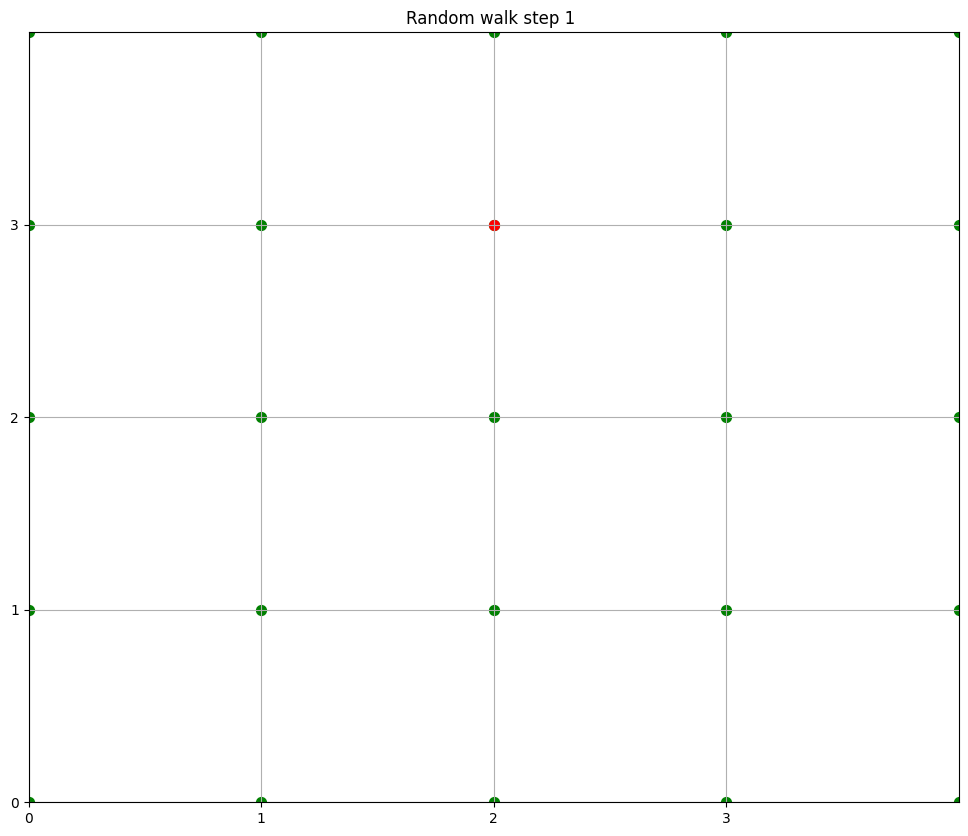

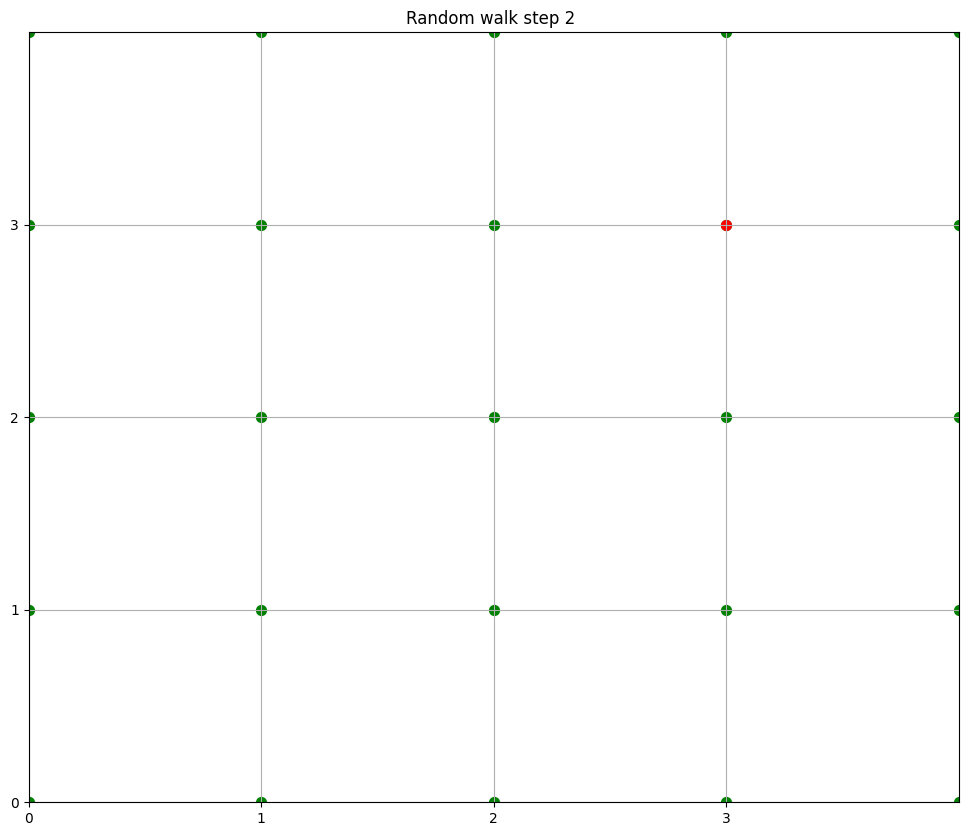

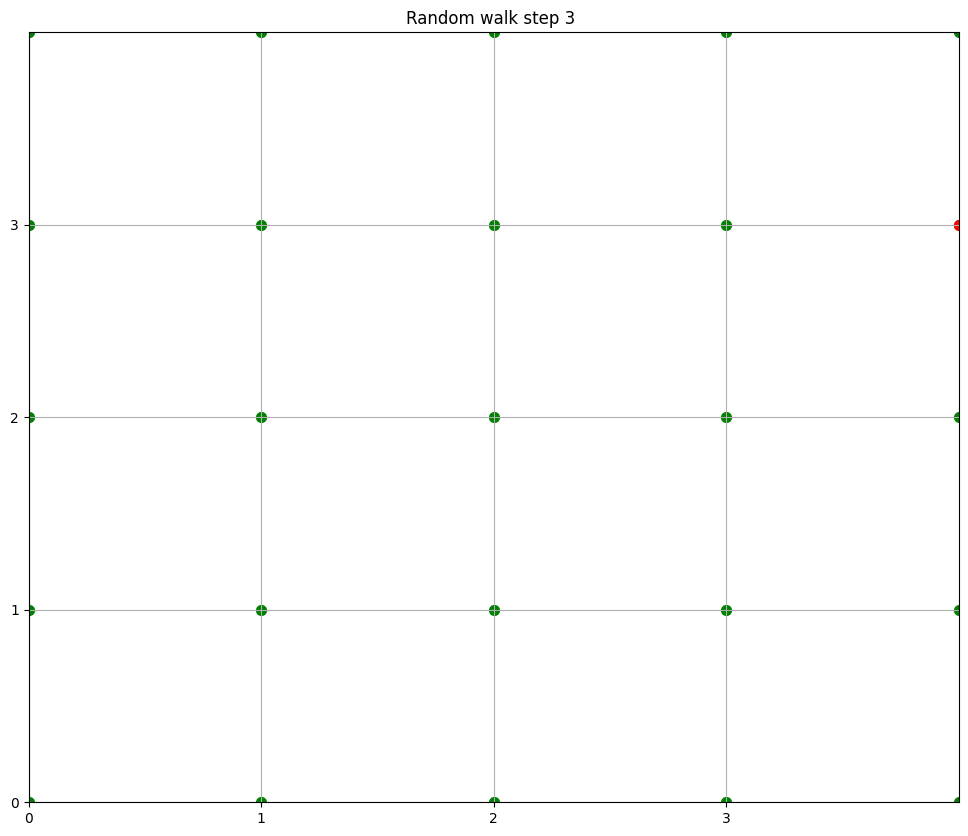

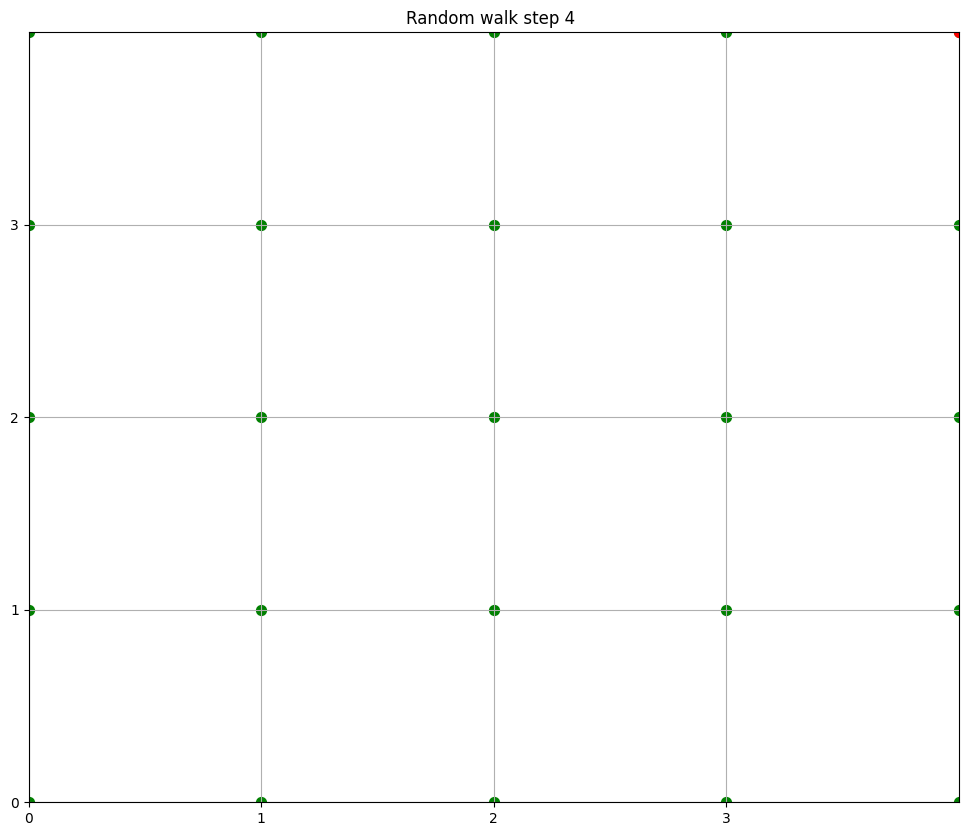

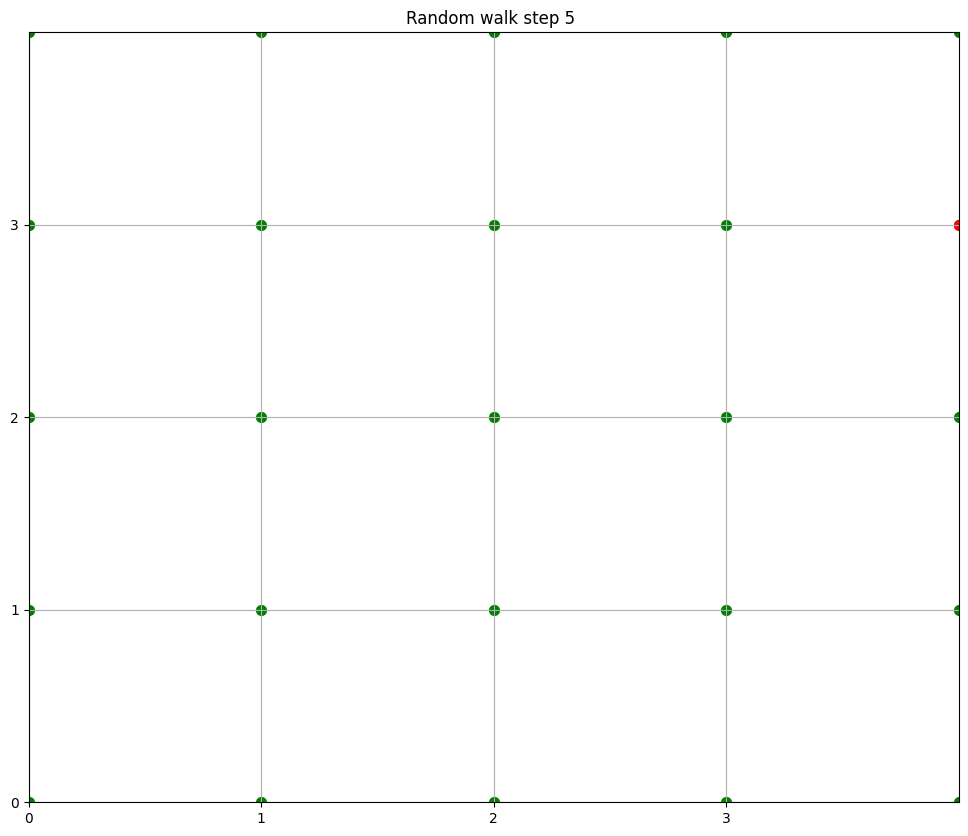

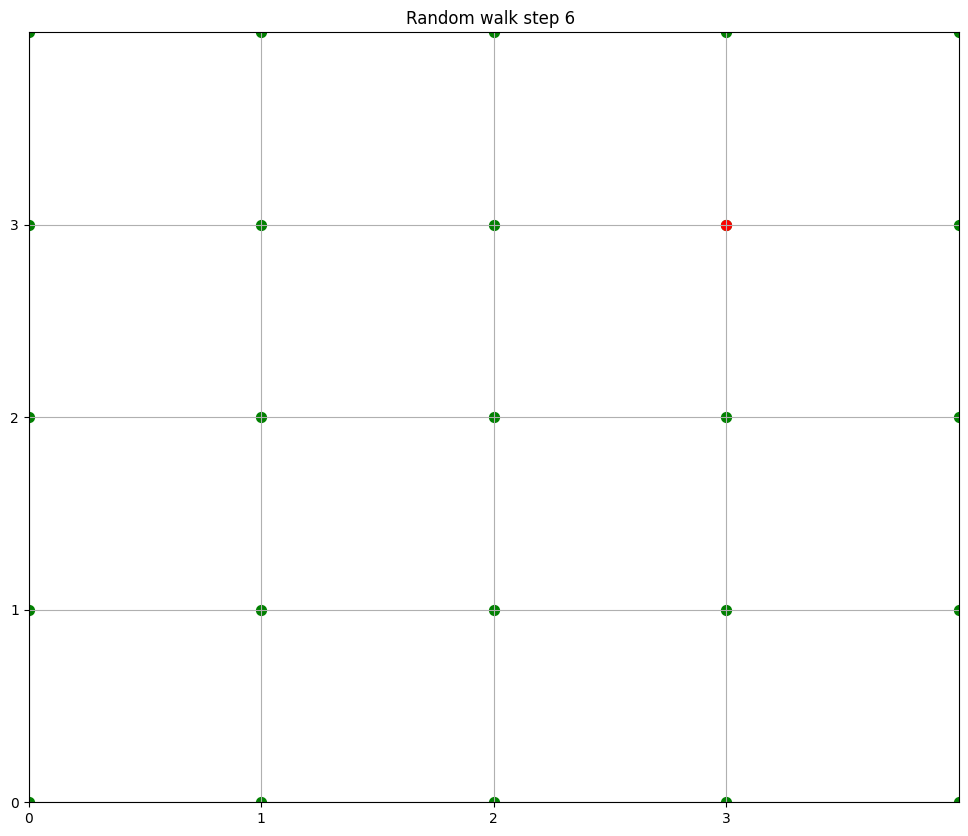

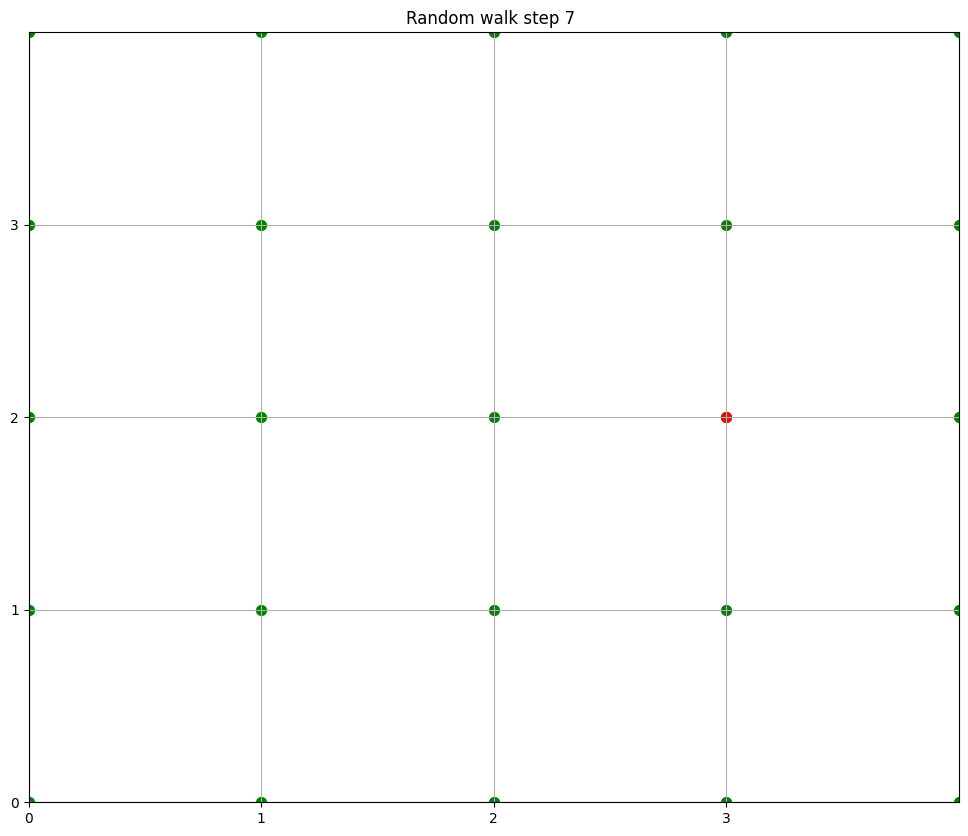

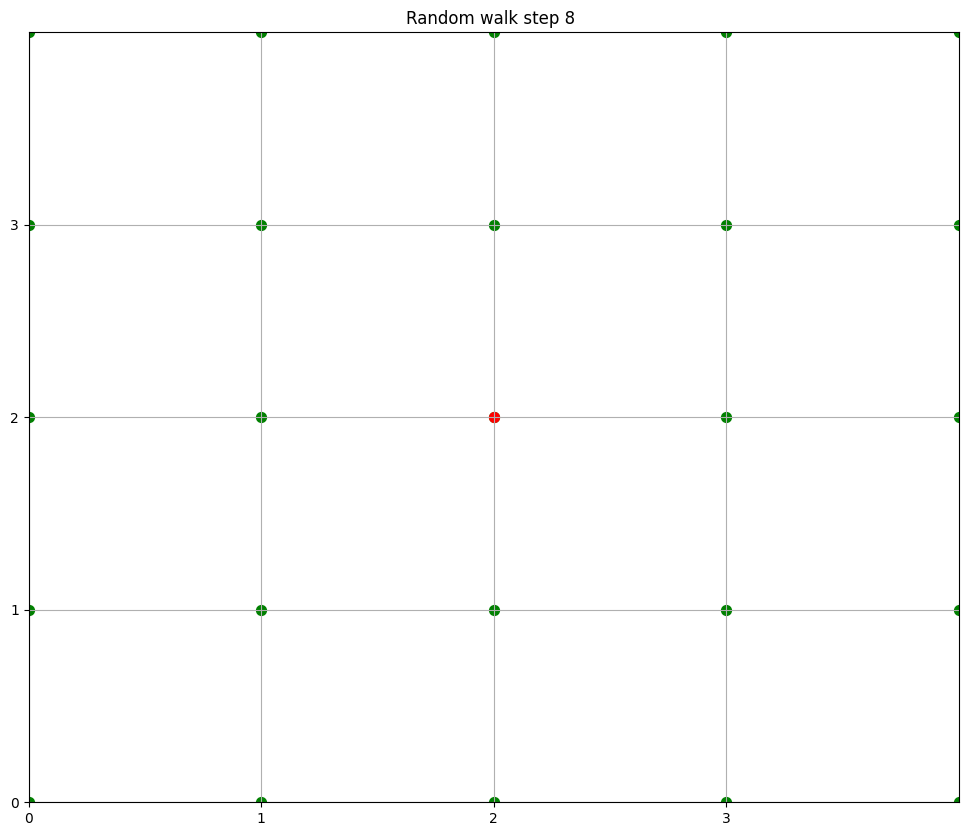

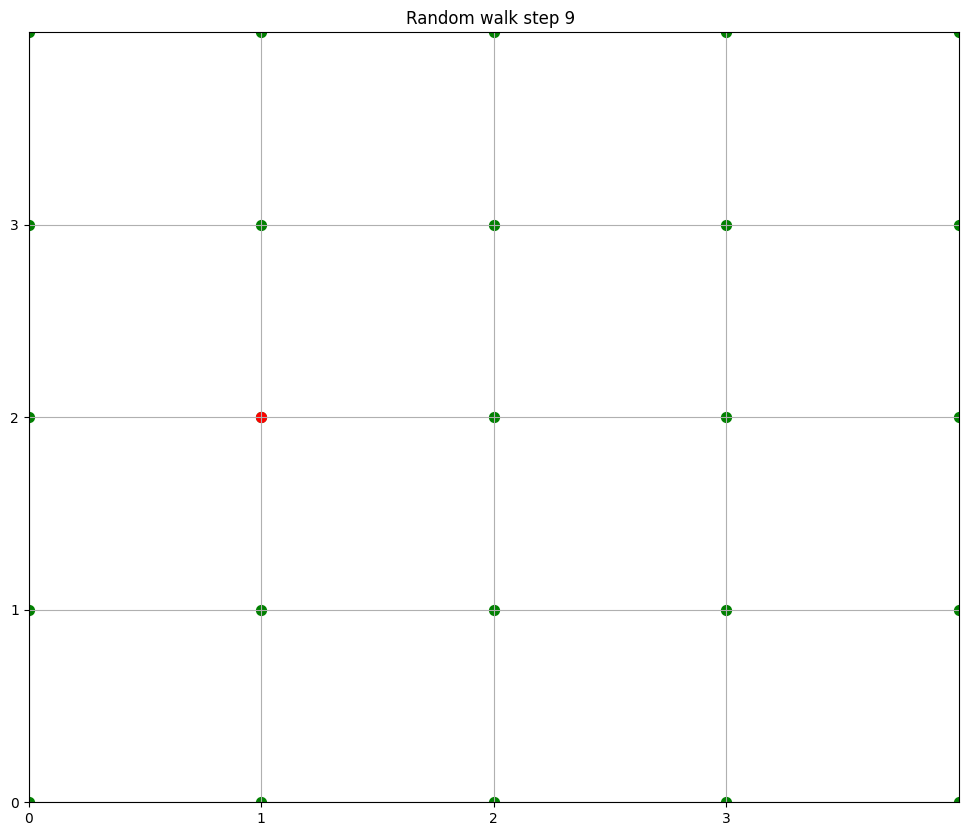

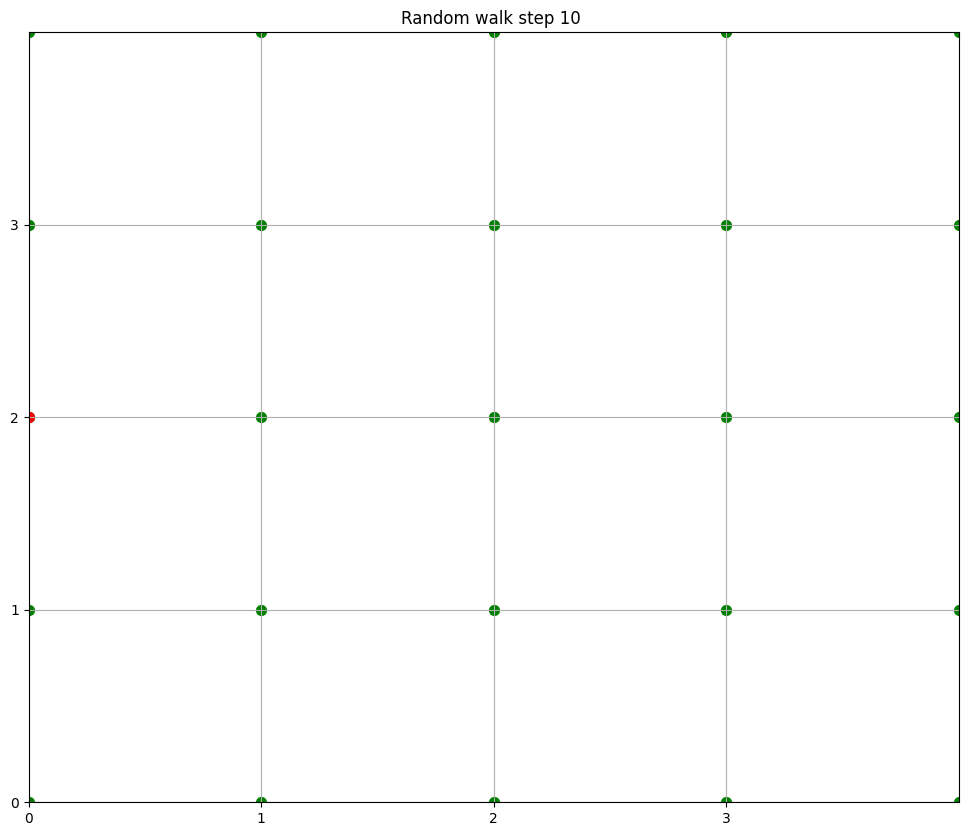

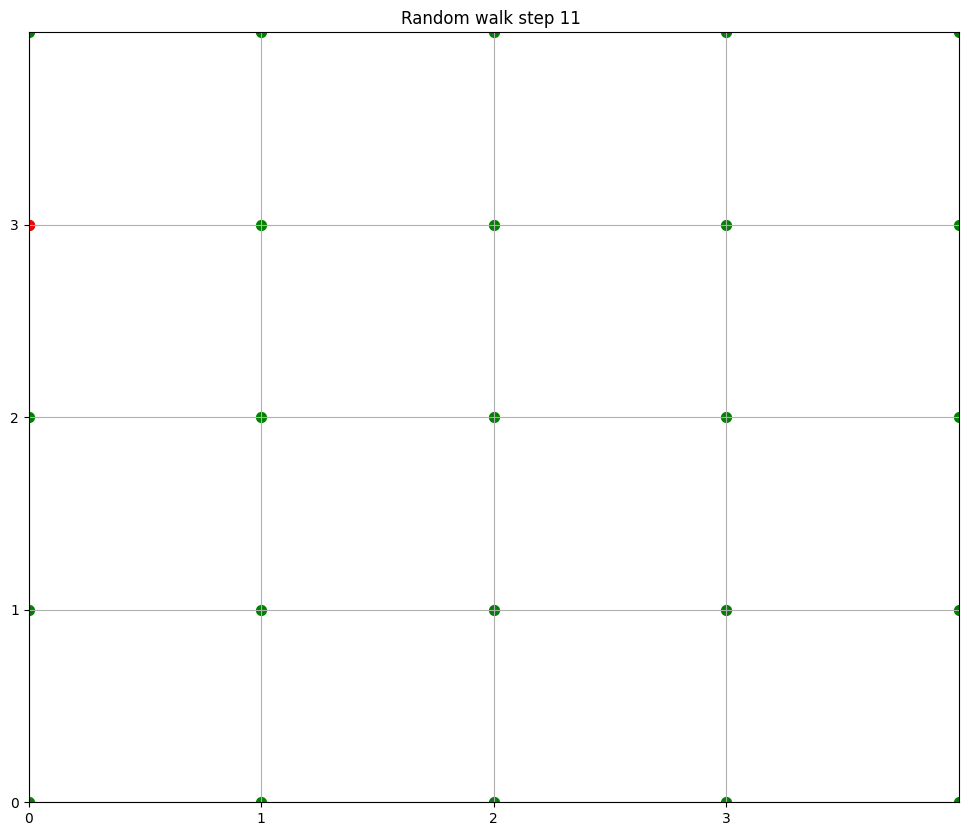

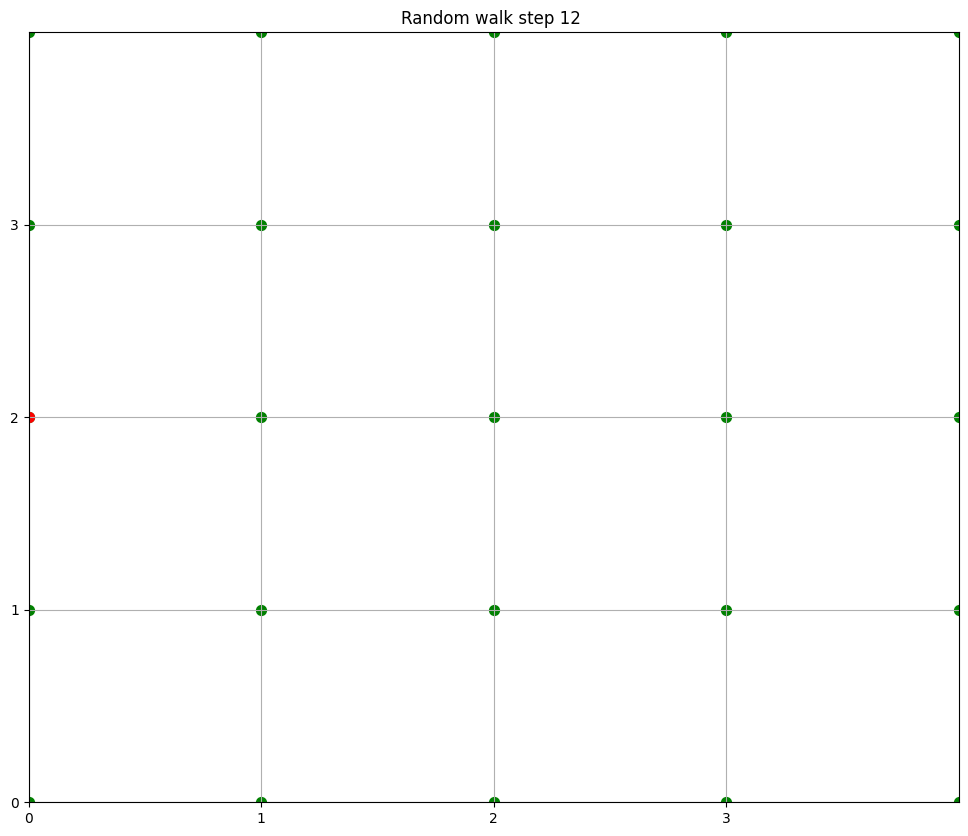

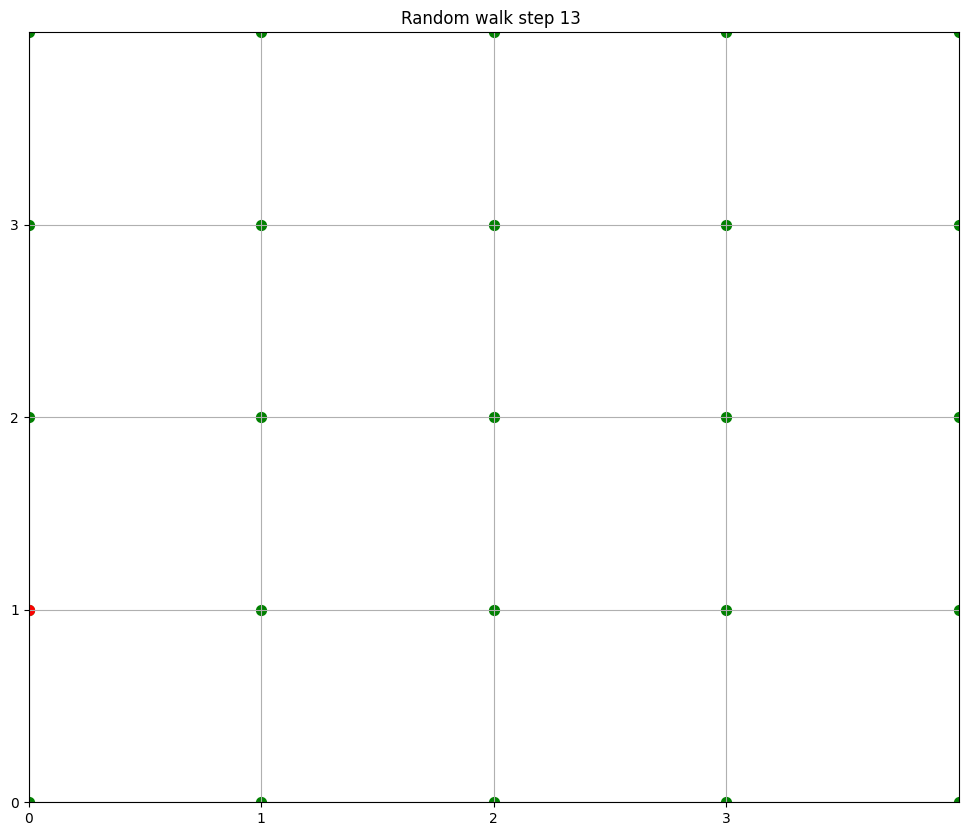

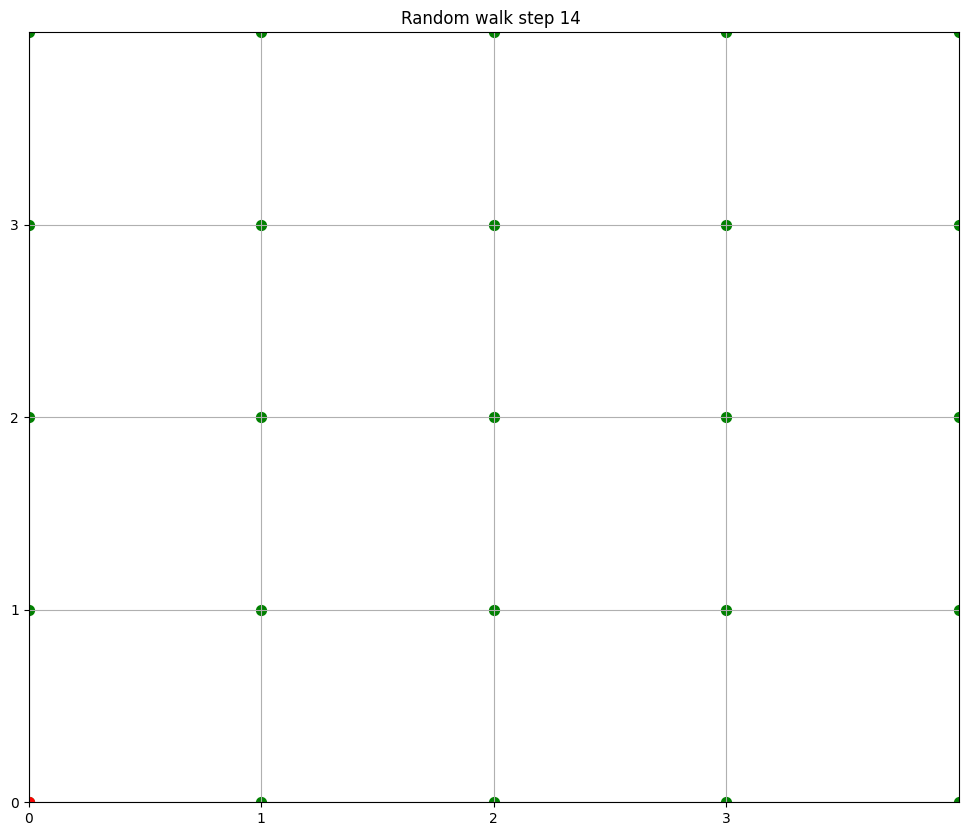

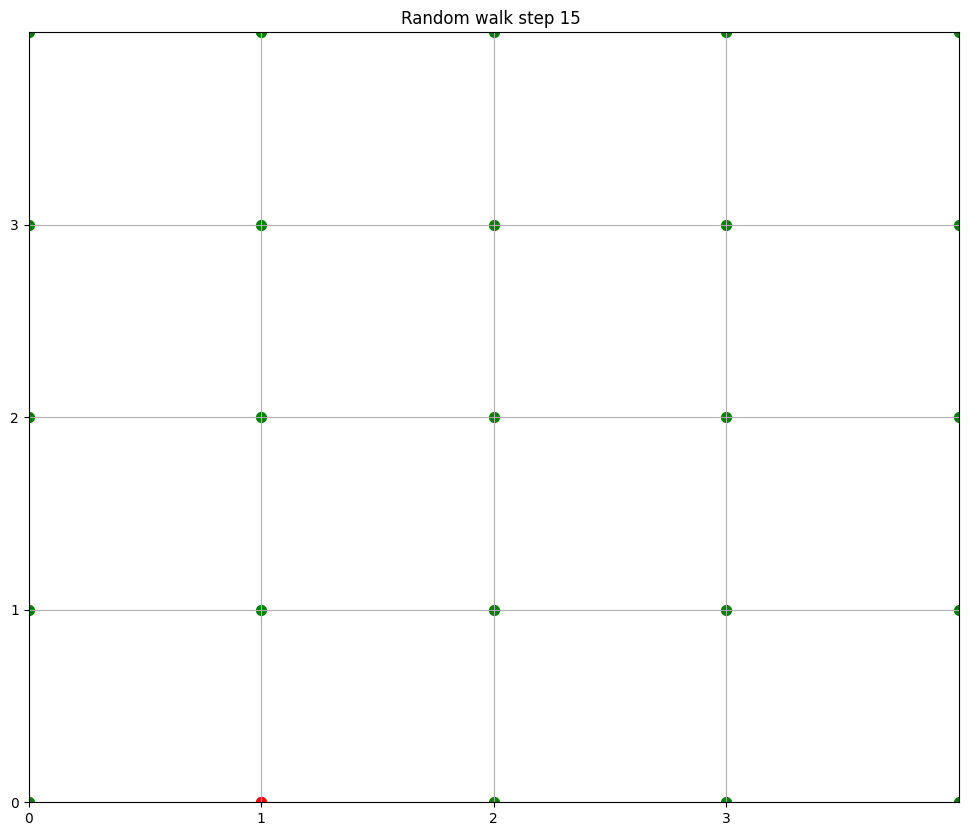

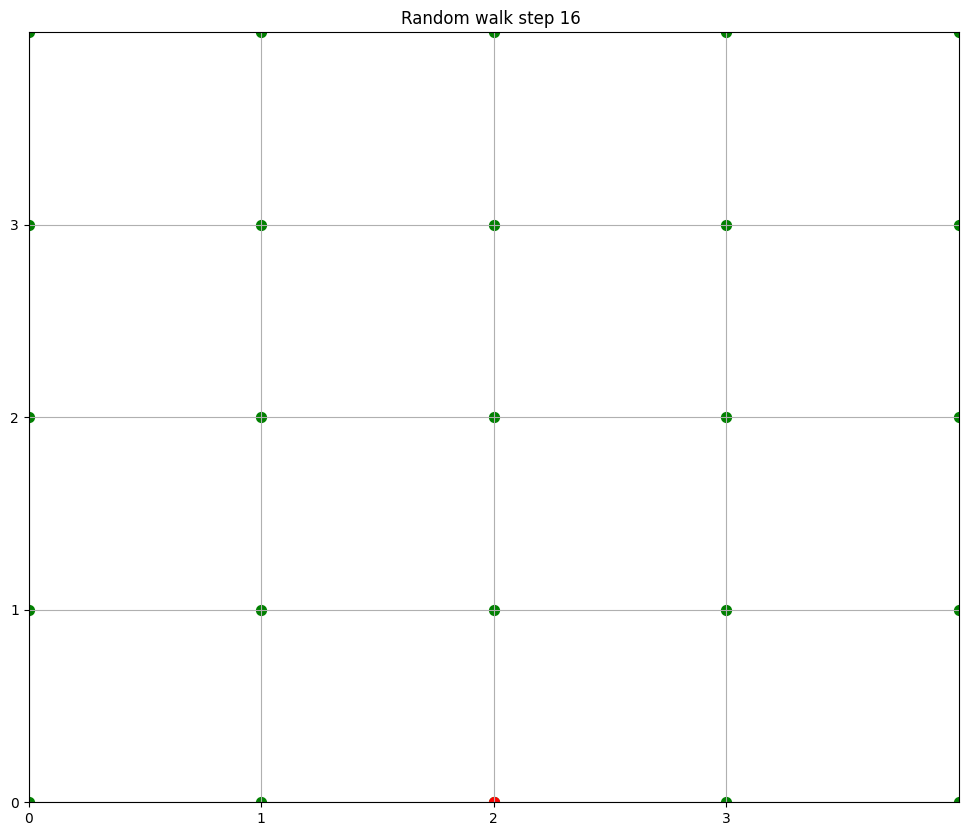

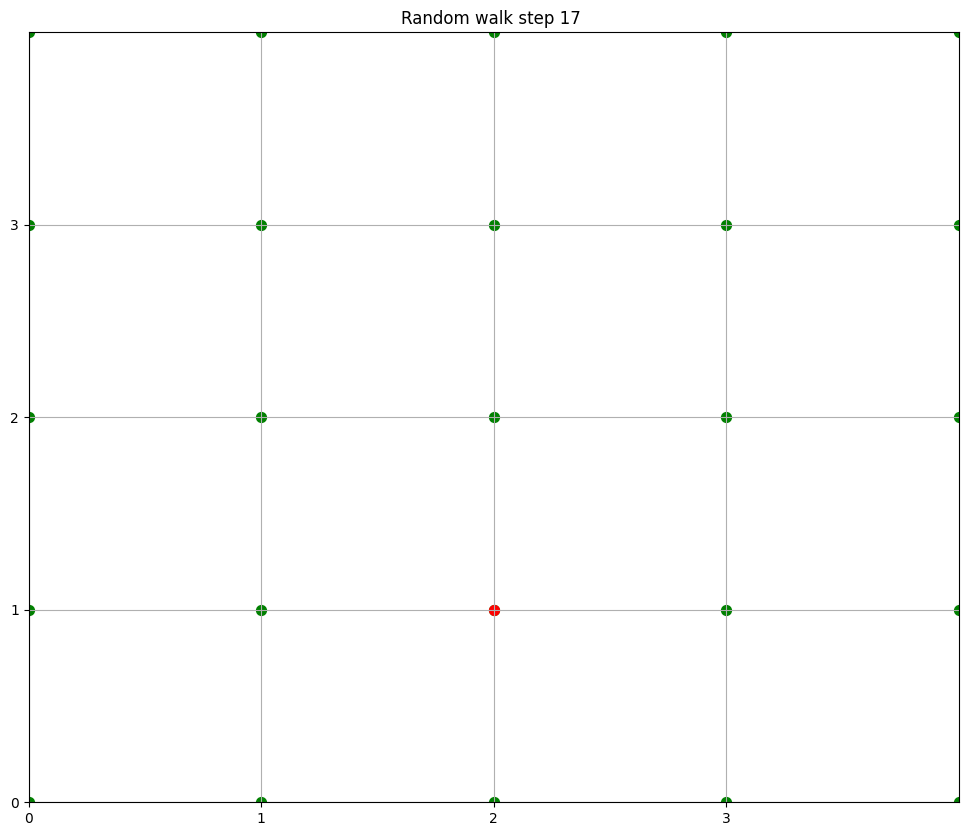

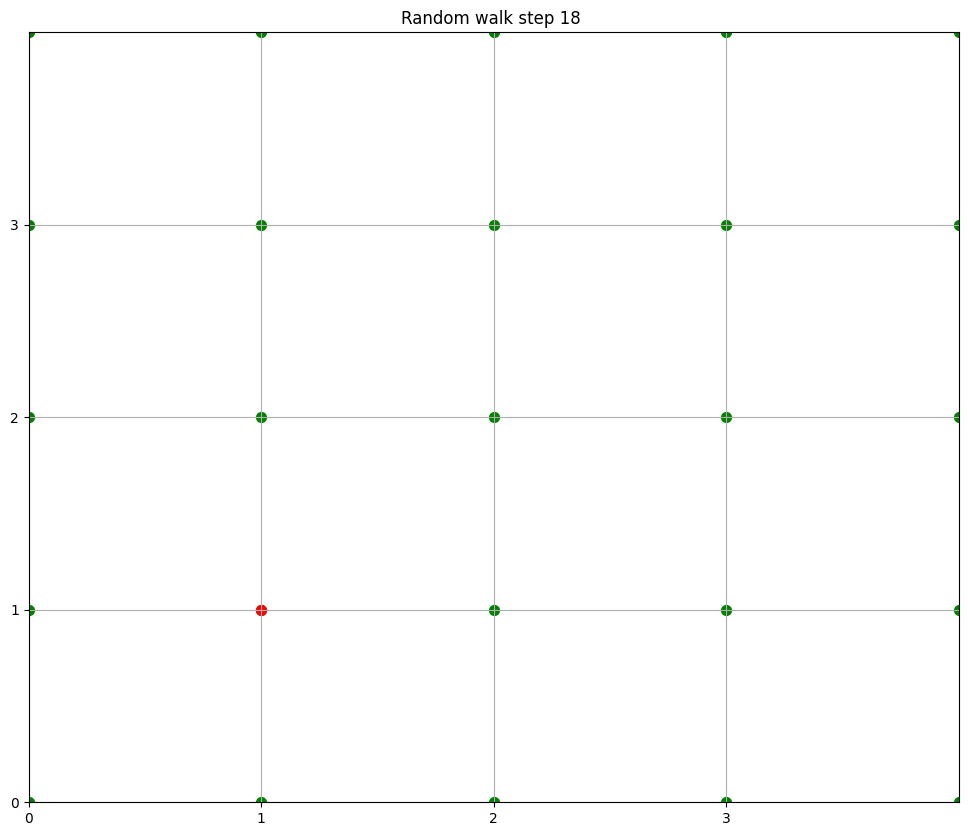

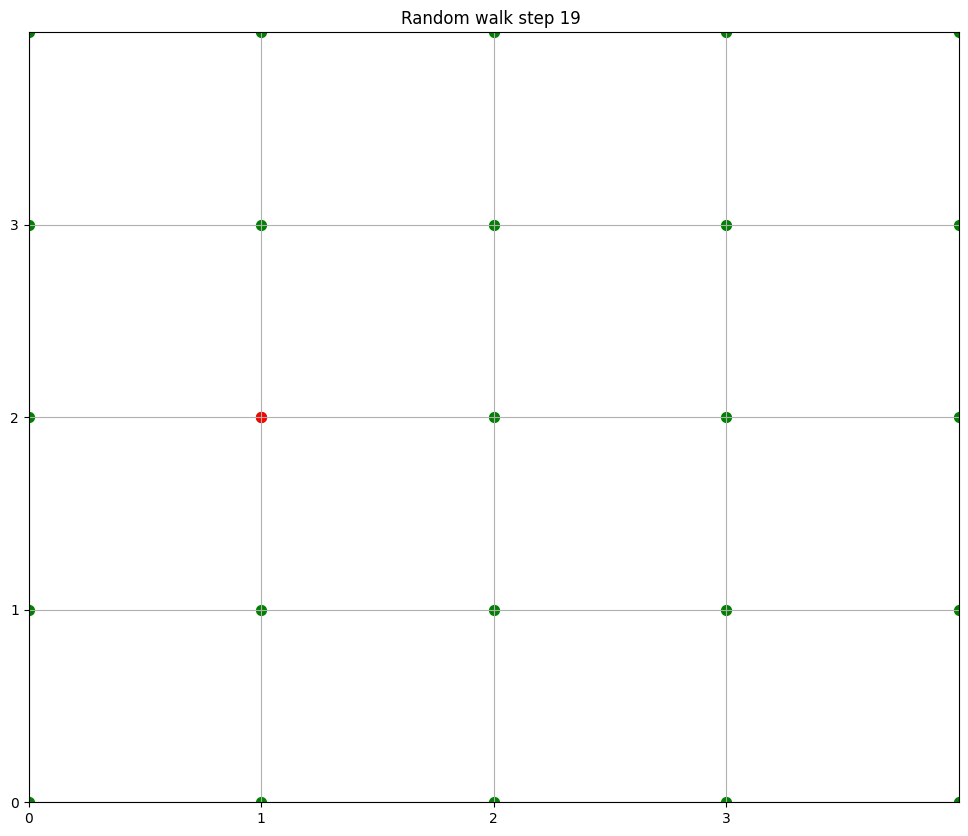

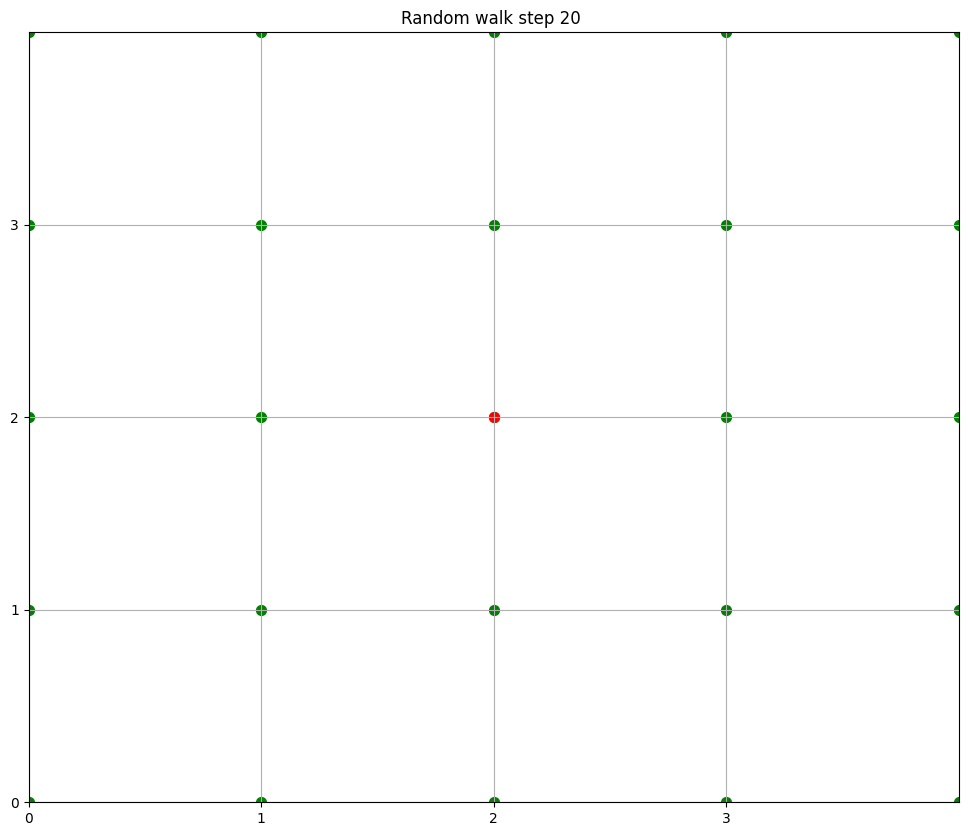

In [51]:
randomWalk(5,20)

## task 2- Pearson Random Walk

In [52]:
def pearsonRandomWalk(n):
    '''Simulate Pearson  random graph in the plane
    n - grapg size, type: int'''
    x = [0]
    y = [0]
    angle = np.random.uniform(0,2*np.pi,n)
    x_cordinates = np.cos(angle)
    y_cordinates = np.sin(angle)
    for i in x_cordinates:
        x.append(i)
    for j in y_cordinates:
        y.append(j)
    x = np.cumsum(x)
    y = np.cumsum(y)
    return x,y

In [53]:
def MonteCarlo(M):
    '''M-number of simulation, type: int'''
    n = 1000
    As = [] #the walker is in right half plane (x > 0)
    Bs = [] #the walker is in the first quadrant (x > 0, y > 0)
    counterAs = 0
    counterBs = 0
    for i in range(M):
        x, y = pearsonRandomWalk(n)
        counterAs = (x>0).sum()
        counterBs = np.logical_and(x>0,y>0).sum()
        As.append(counterAs/n)
        Bs.append(counterBs/n)
    meanAs = mean(As)
    meanBs = mean(Bs)
    return As, Bs, meanAs, meanBs
        

In [54]:
As, Bs, meanAs, meanBs = MonteCarlo(1000)

In [55]:
print('Mean value for As is ', meanAs)
print('Mean value for Bs is ', meanBs)

Mean value for As is  0.49872
Mean value for Bs is  0.240558


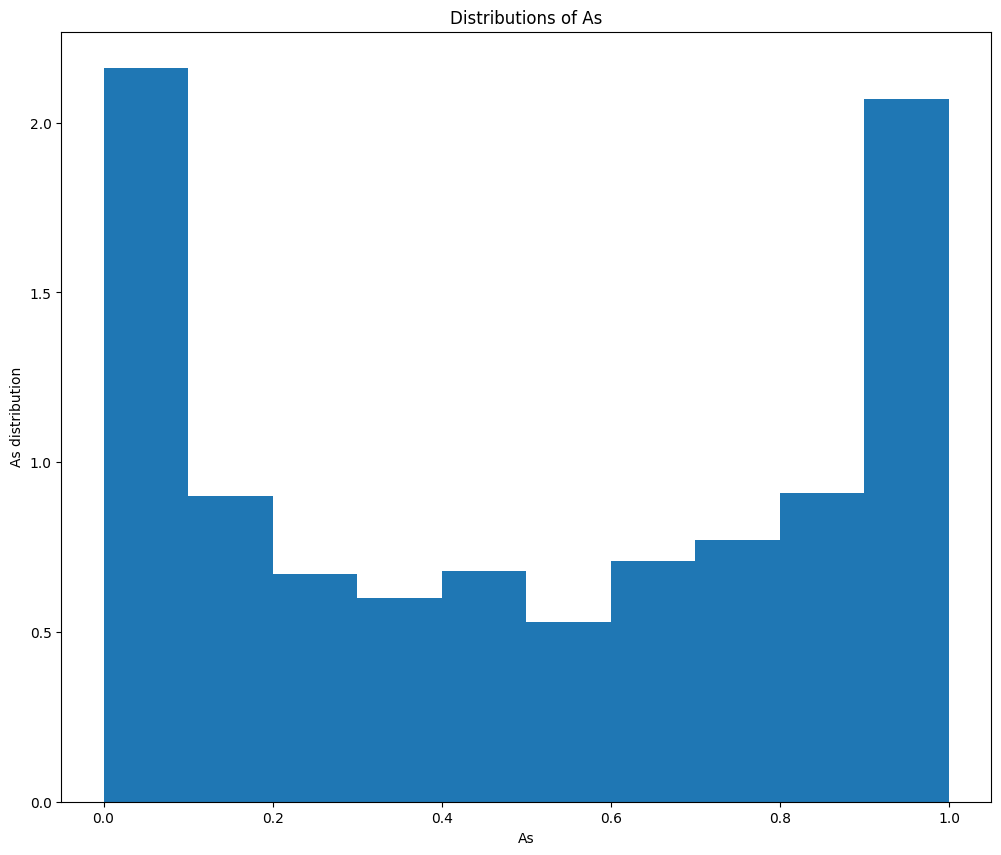

In [56]:
fig = plt.figure()
#sns.histplot(x = As, discrete = True, stat = 'probability')
plt.hist(As,density = True)
plt.title("Distributions of As")
plt.xlabel('As')
plt.ylabel('As distribution')
plt.show()

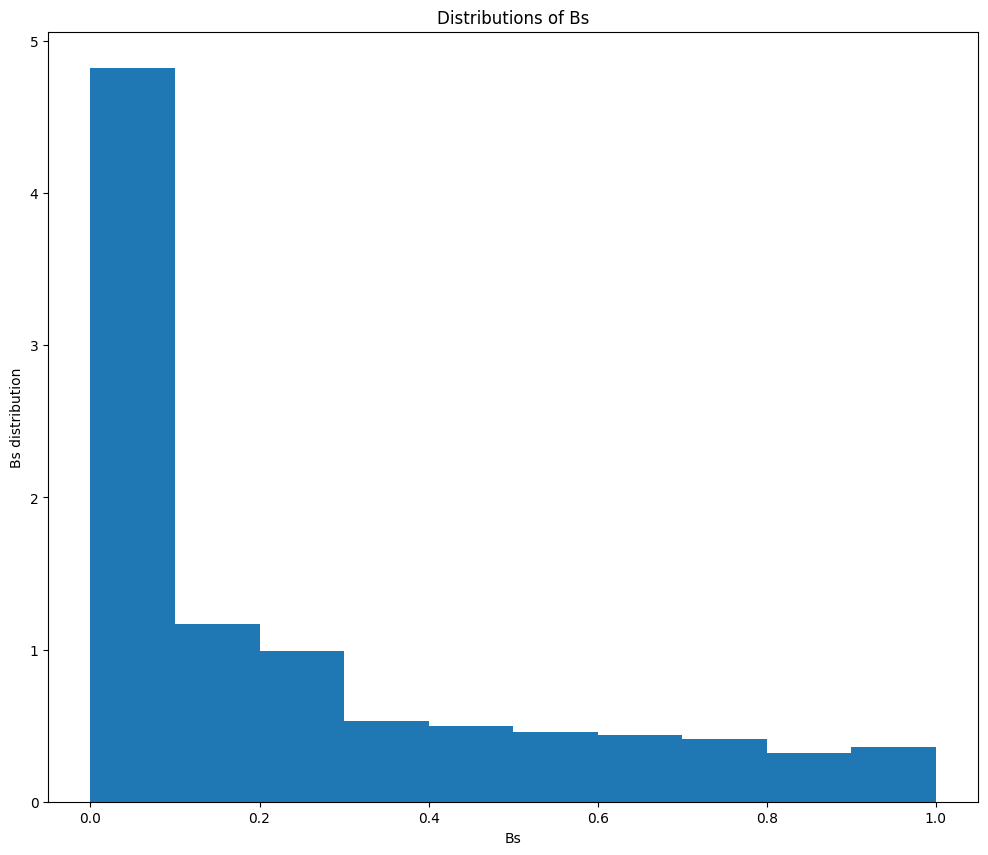

In [57]:
fig = plt.figure()
#sns.histplot(x = As, discrete = True, stat = 'probability')
plt.hist(Bs,density = True)
plt.title("Distributions of Bs")
plt.xlabel('Bs')
plt.ylabel('Bs distribution')
plt.show()

Text(0.5, 1.0, 'Sample random walk with 1000 steps')

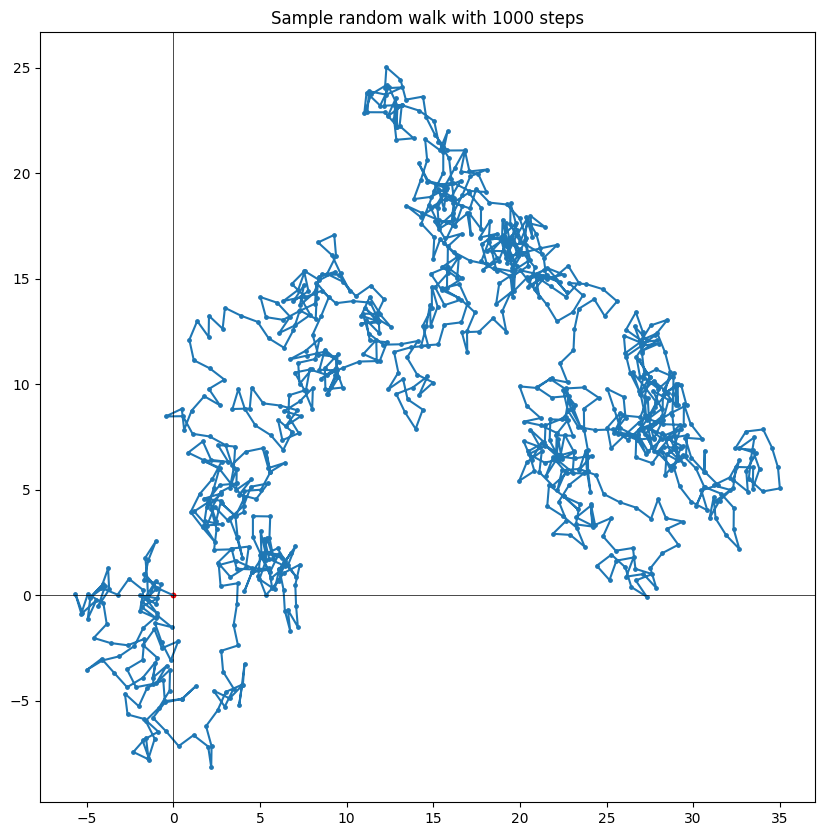

In [58]:
N = 1000
x,y = pearsonRandomWalk(N)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,y)
ax.scatter(x,y, s = 6)
ax.scatter(0,0, c= 'r',s = 10)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
plt.title('Sample random walk with 1000 steps')

Text(0.5, 1.0, 'Sample random walk with 1000 steps')

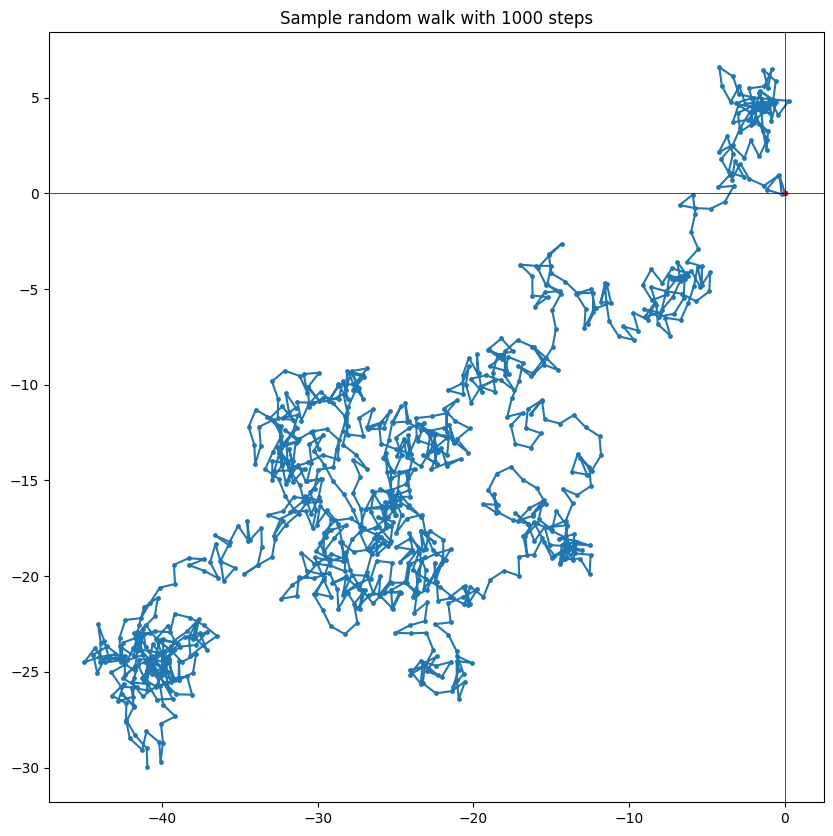

In [59]:
N = 1000
x,y = pearsonRandomWalk(N)
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,y)
ax.scatter(x,y, s = 6)
ax.scatter(0,0, c= 'r',s = 10)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
plt.title('Sample random walk with 1000 steps')

## Task3

In [60]:
def graphRandomWalk(Graph, steps, startNode):
    '''Representation of random walk in the graph.
    Graph is the type of graph: random graph, watt-strogatz model or barabasi-albert model
    steps - number of steps in the rundom graph, type: int
    startNode - the node for which we start, type: int
    Function return the list of visited node during the walk'''
    visitedNode = []
    if type(steps) == int and type(startNode) == int and type(Graph) == nx.classes.graph.Graph:
        if steps > 0:
            visitedNode.append(startNode)
            for i in range(1,steps):
                neighborsOfStartNode = list(H.neighbors(visitedNode[-1]))
                visitedNode.append(np.random.choice(neighborsOfStartNode))
        else:
            raise ValueError('Number of steps must be grater than 0')
    else:
        raise ValueError('Incorrect type of arguments. Steps and startNode must be int, G must be type graph')
    return visitedNode
    

In [61]:
def Gif(Graph, visited,steps,title,path):
    '''Generate the Gif from the given graph. 
    Graph is the type of graph: random graph, watt-strogatz model or barabasi-albert model
    visited is the list of visited node for selected model
    steps is number of steps in the walk 
    title is the title of the picture
    path is the path to the folder where I save gif'''
    nodes = Graph.nodes()
    photos = []
    pos = nx.kamada_kawai_layout(Graph)
    for i in range(steps):
        colors = []
        for n in nodes:
            if n == visited[i]:
                colors.append('r')
            elif n in visited[:i]:
                colors.append('g')
            else:
                colors.append('b')
        plt.figure(figsize = (5,5))
        plt.title(title + str(i))
        nx.draw(Graph, with_labels = True,pos = pos, node_color = colors)
        plt.savefig(f'stepRGRW{i}.png') 
        graphName = f'stepRGRW{i}.png'
        photos.append(graphName)
    images = []
    for photo in photos:
        image = imageio.imread(photo)
        images.append(image)
    imageio.mimsave(path, images,duration = 0.3)
        

## random graph

In [62]:
H = nx.gnm_random_graph(20,40)
steps = 20
startNode = 0

In [63]:
visitedRandomGraph = graphRandomWalk(H, steps, startNode)

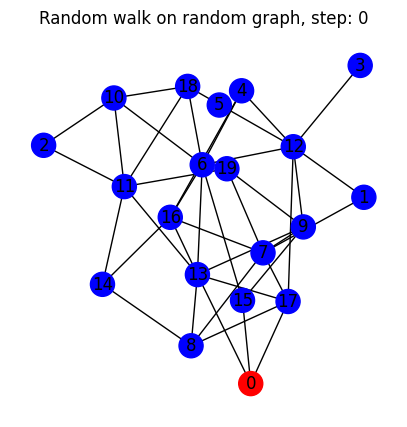

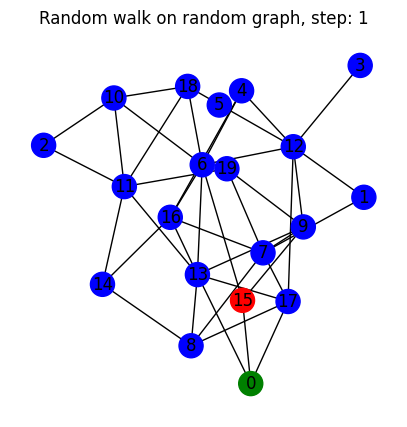

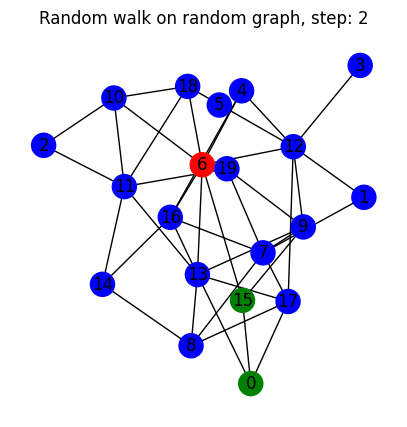

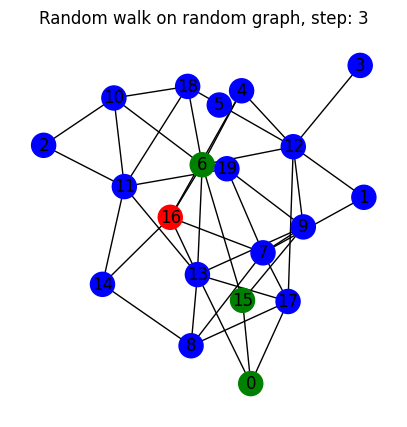

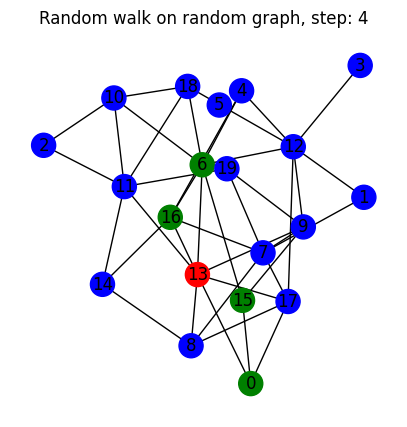

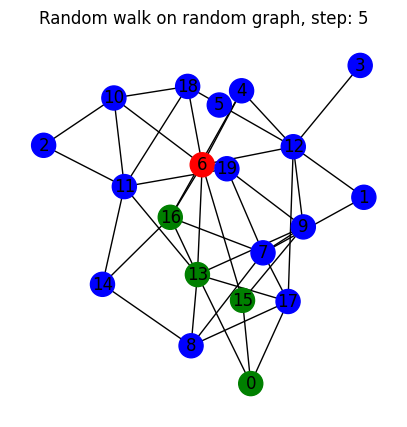

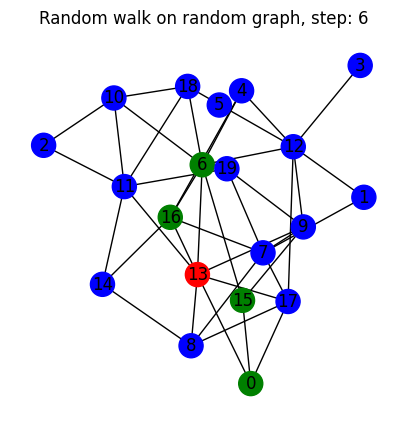

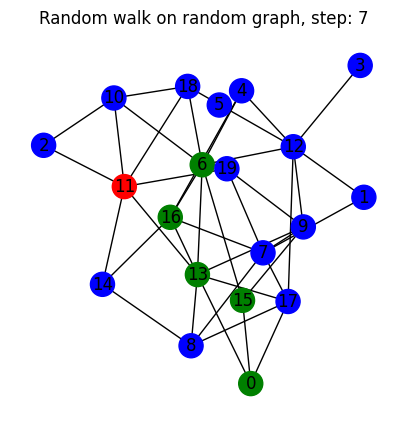

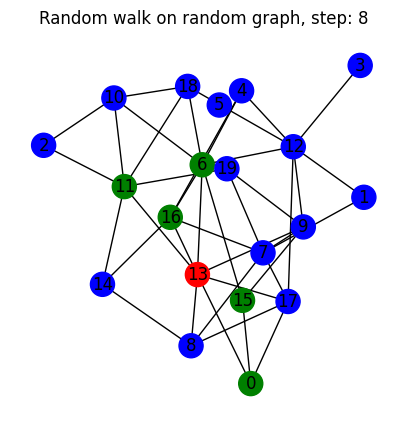

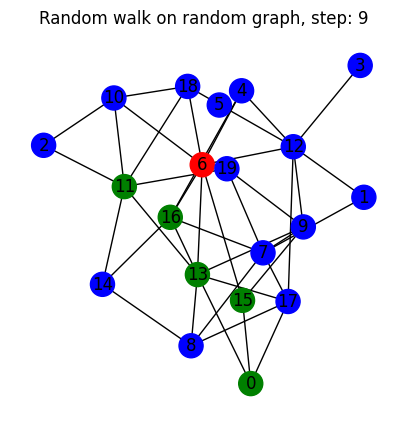

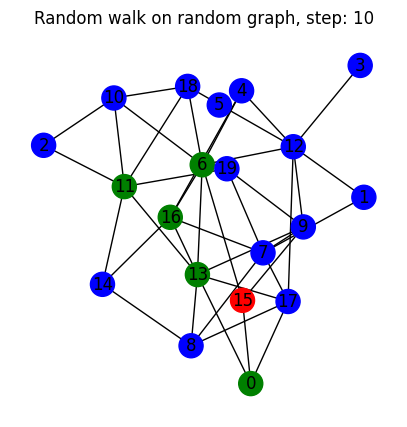

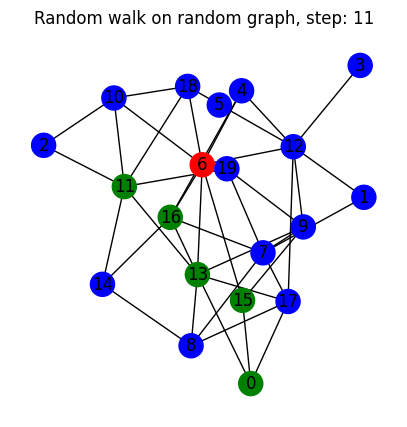

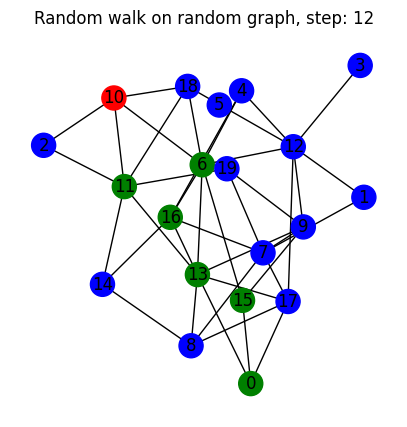

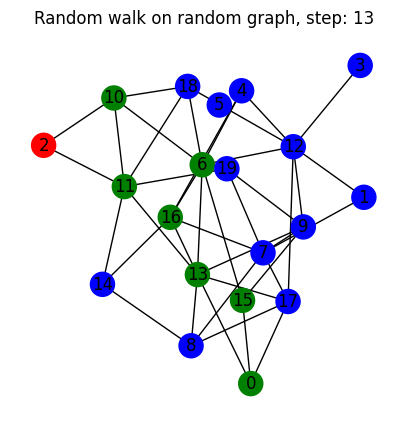

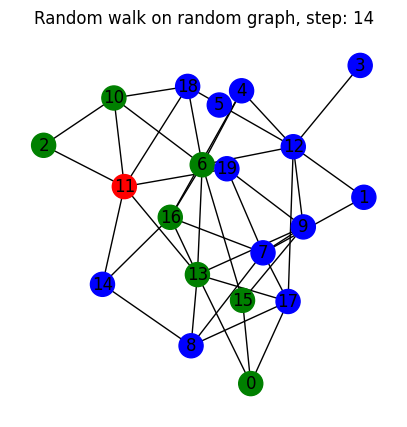

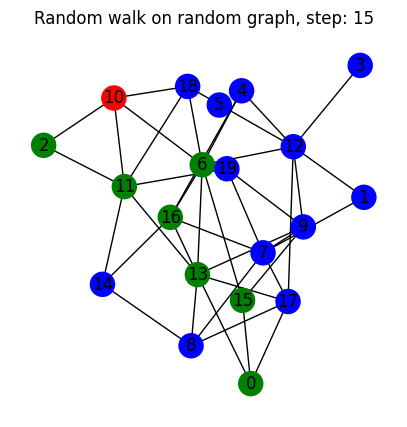

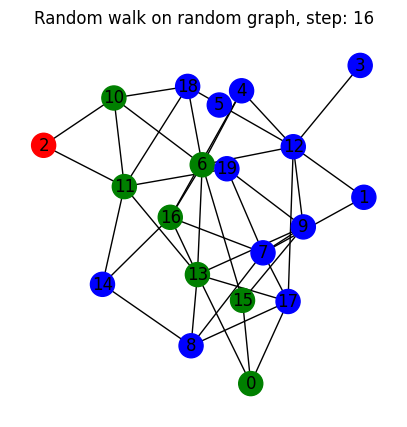

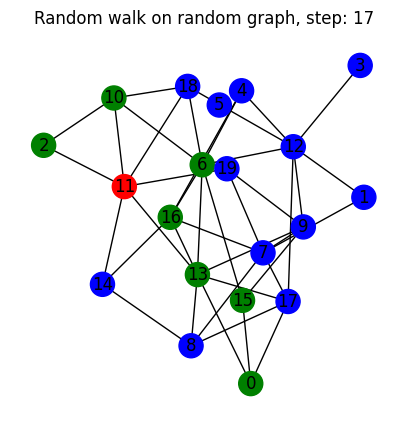

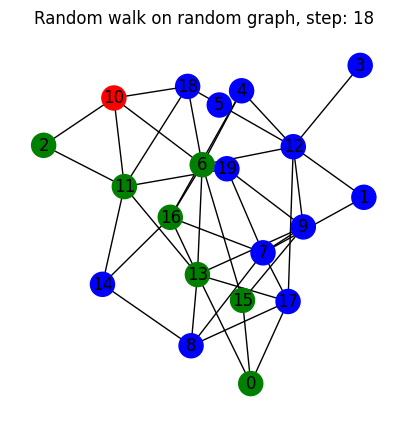

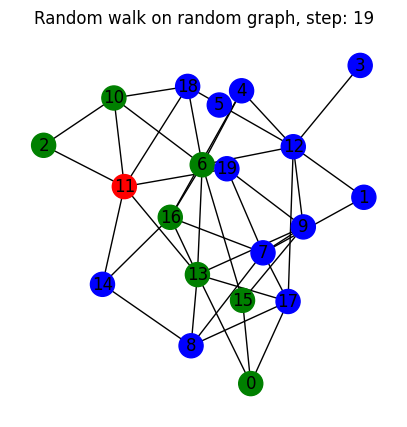

In [64]:
Gif(H, visitedRandomGraph,steps,'Random walk on random graph, step: ','C:/Users/user/Desktop/list4/randomWalk1.gif')

### Watt-Strogatz Model

In [65]:
H_WS = nx.watts_strogatz_graph(20,4,0.3)
stepsWS = 20
startNodeWS = 0

In [66]:
visitedWSModel = graphRandomWalk(H_WS, stepsWS, startNodeWS)

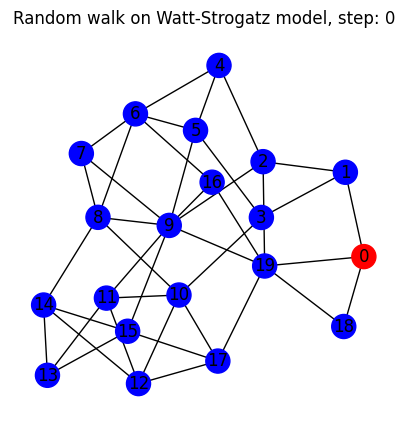

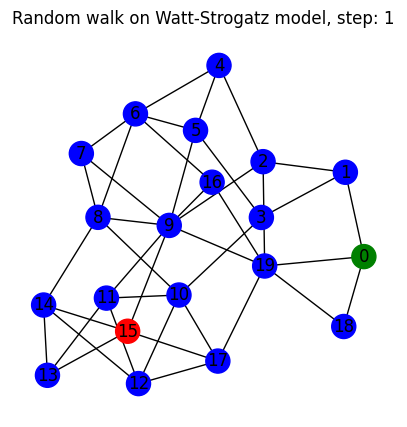

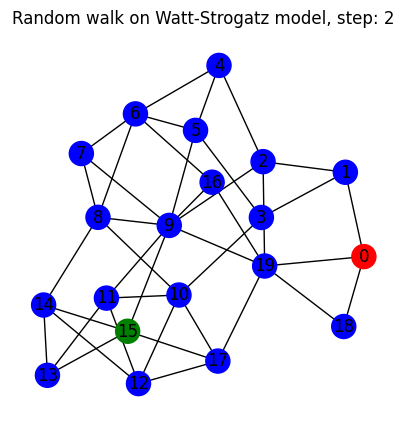

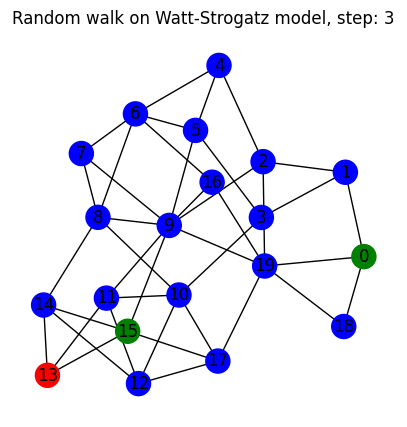

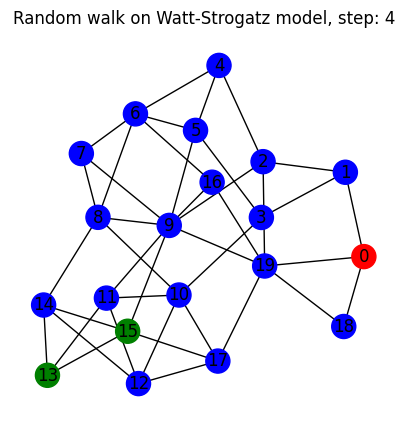

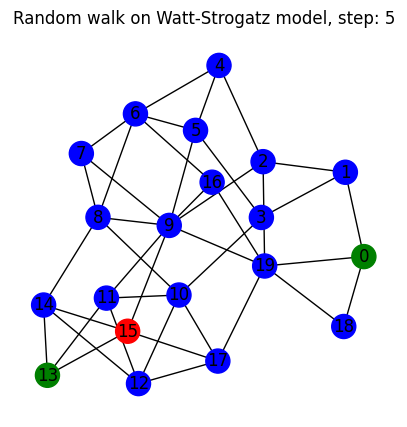

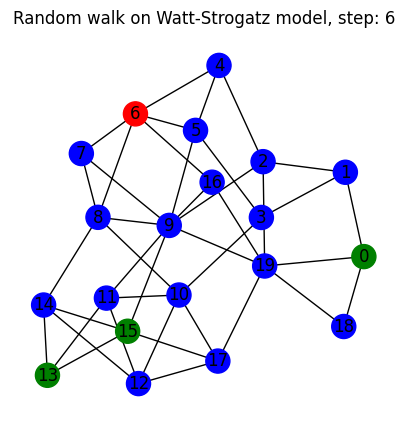

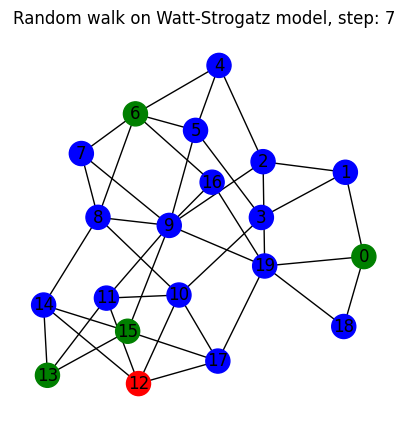

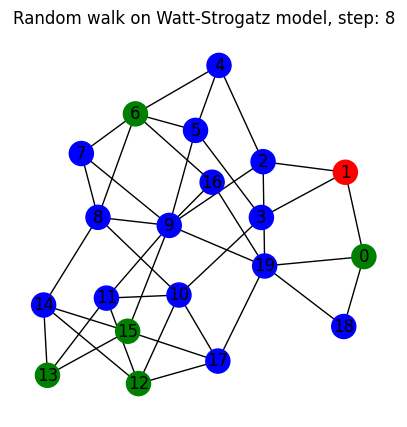

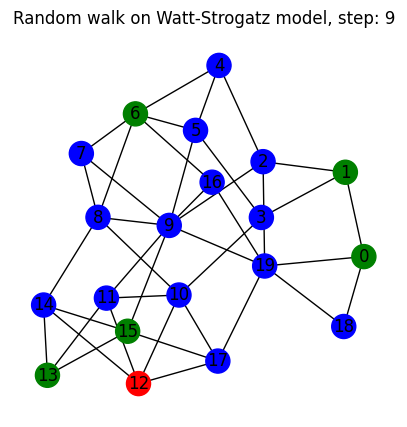

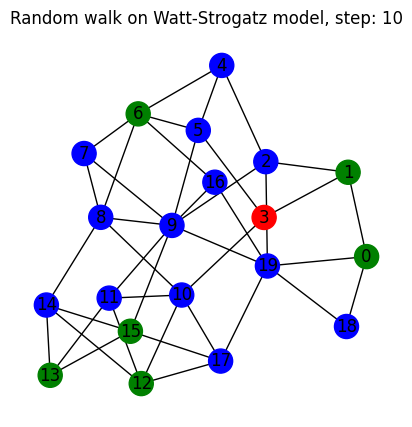

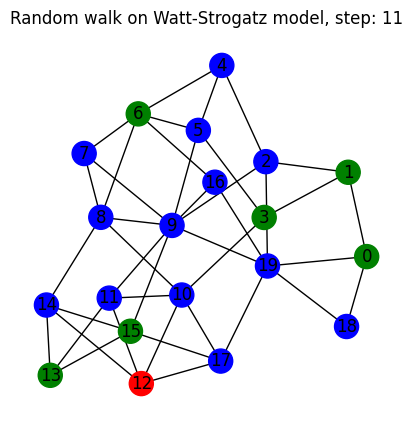

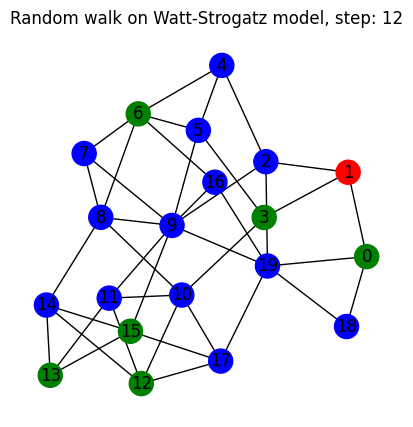

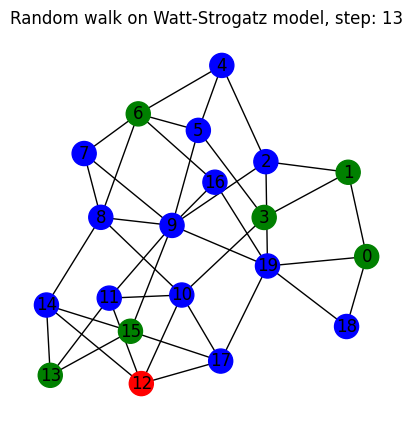

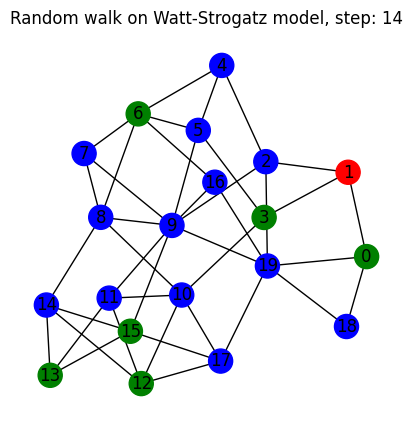

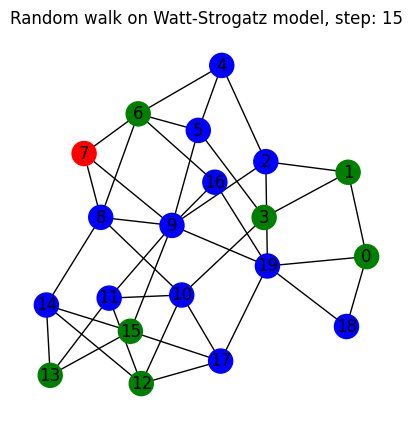

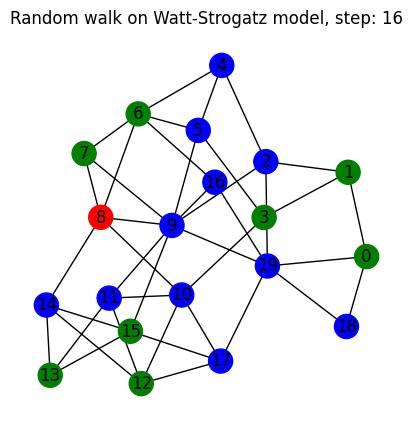

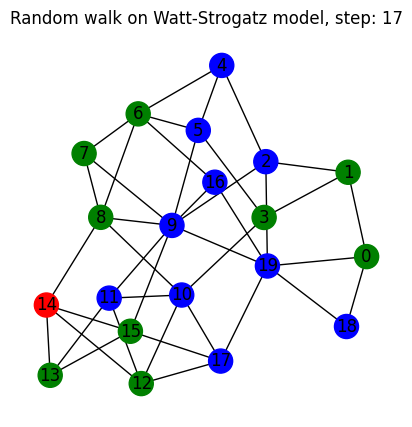

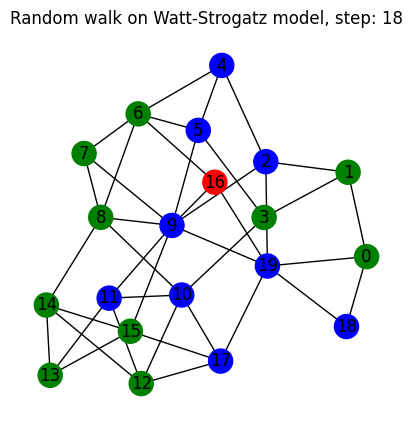

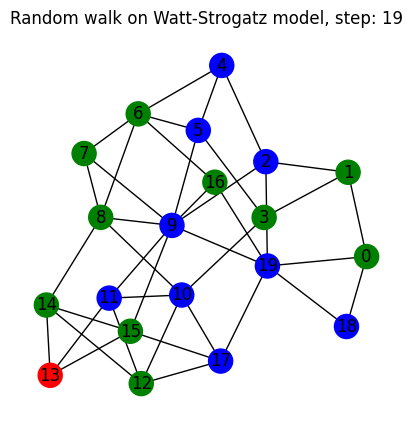

In [67]:
Gif(H_WS, visitedWSModel, stepsWS,'Random walk on Watt-Strogatz model, step: ','C:/Users/user/Desktop/list4/randomWalkOnWSModel.gif')

### Barabasi-Albert Model

In [68]:
H_BA = nx.barabasi_albert_graph(20, 4)
stepsBA = 20
startNodeBA = 0

In [69]:
visitedBAModel = graphRandomWalk(H_BA, stepsBA, startNodeBA)

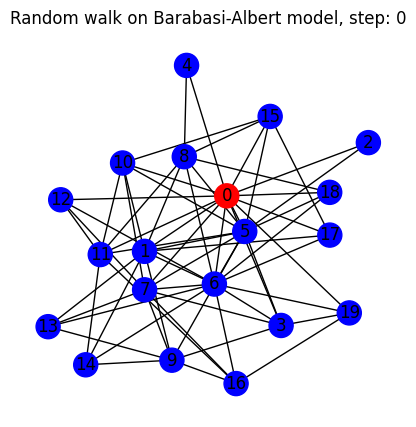

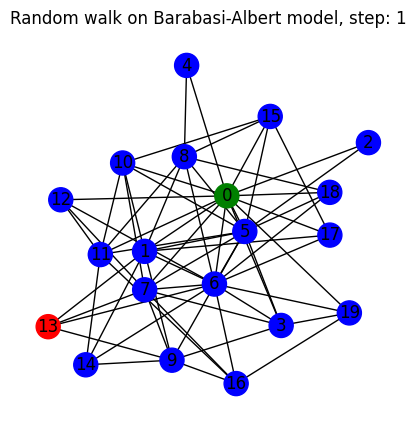

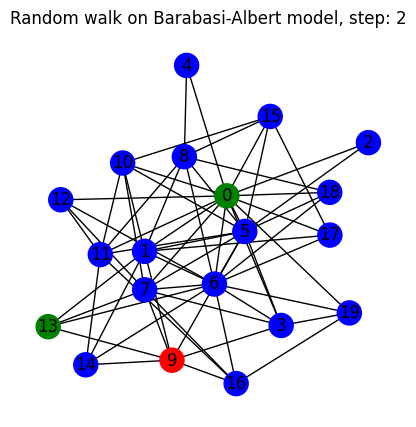

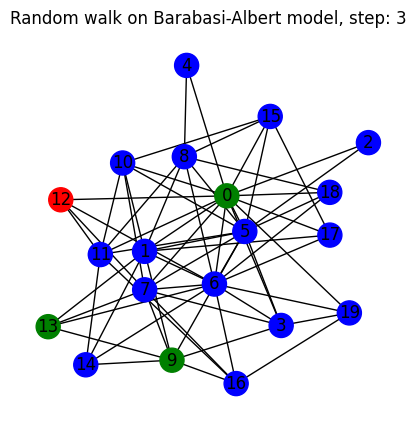

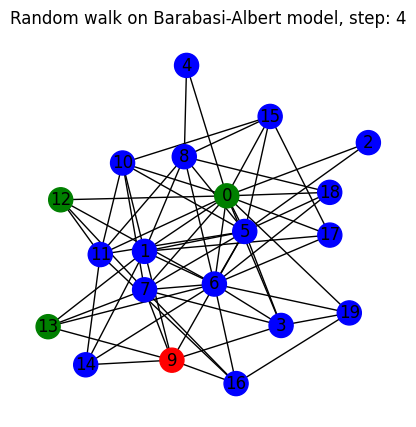

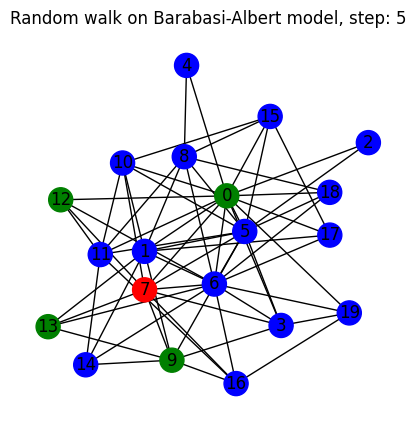

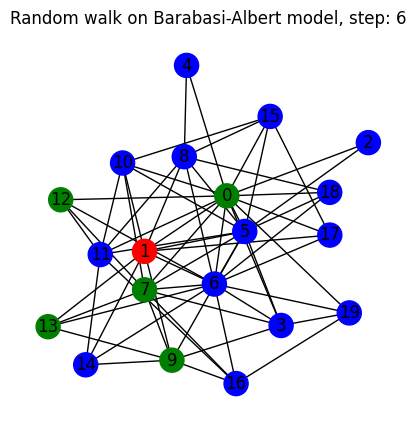

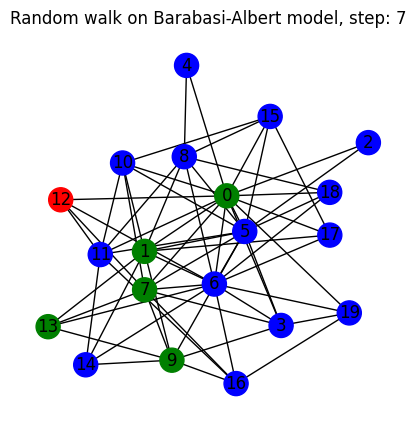

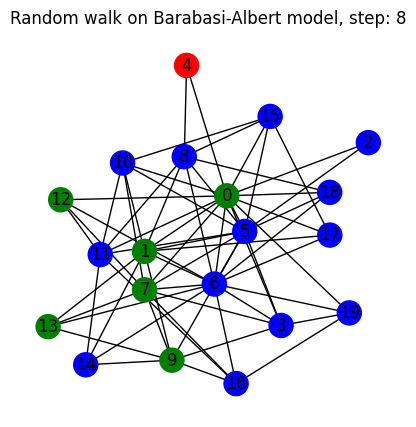

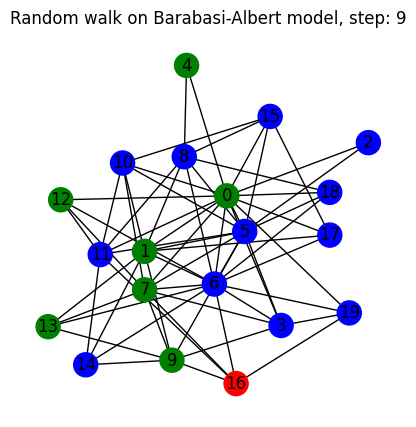

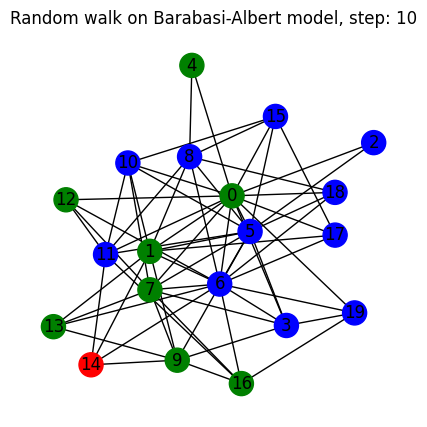

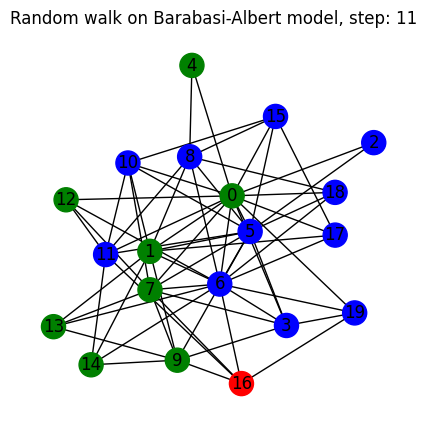

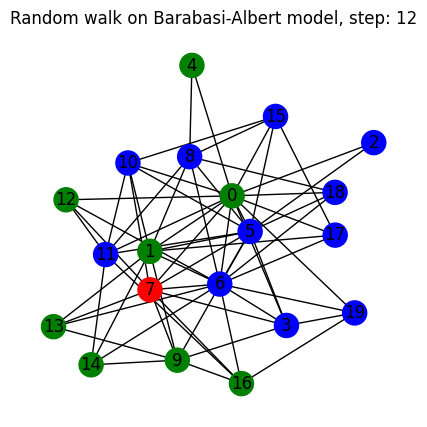

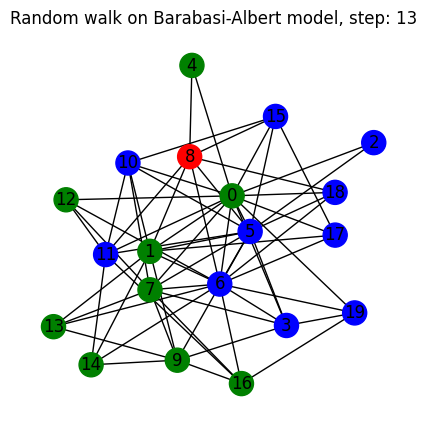

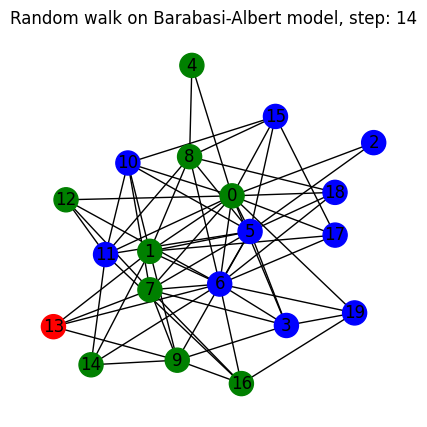

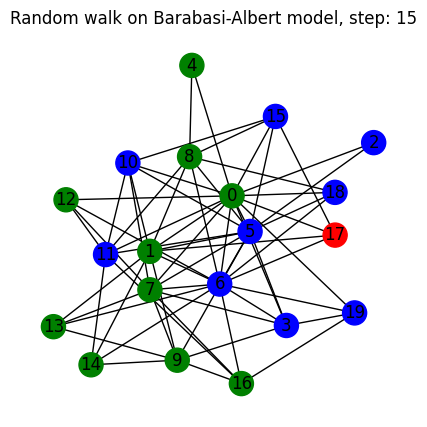

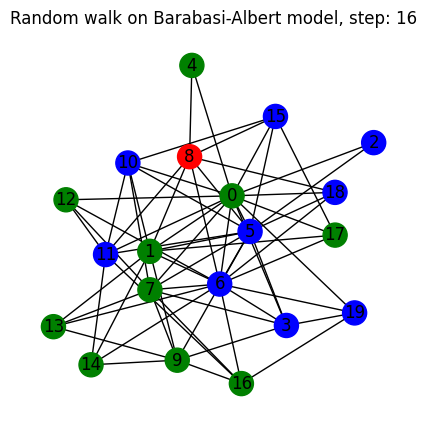

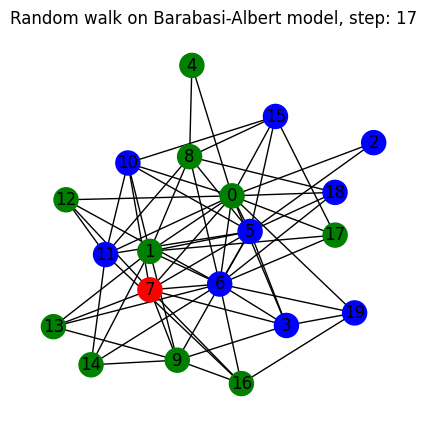

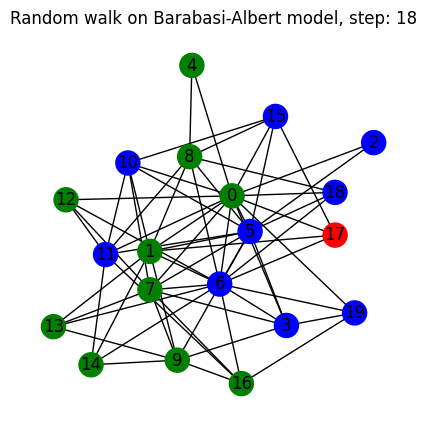

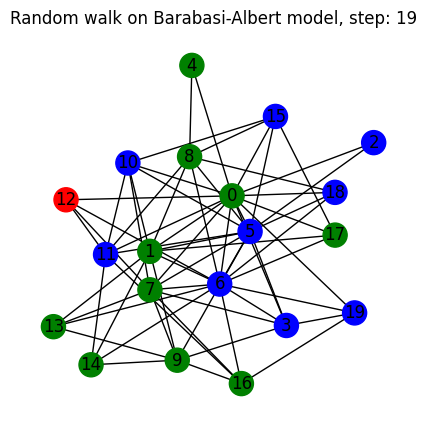

In [70]:
Gif(H_BA, visitedBAModel, stepsBA,'Random walk on Barabasi-Albert model, step: ','C:/Users/user/Desktop/list4/randomWalkOnBAModel.gif')